In [1]:
import polars as pl
import requests
# to enrich the examples in this quickstart with dates
from datetime import datetime, timedelta 
# to generate data for the examples
import numpy as np 
from os import listdir
import matplotlib.pyplot as plt
from functions import get_price, get_tag

In [89]:
fname=listdir("data\\")[0]
df=pl.read_csv(f"data\\{fname}")
CloseV=df.select("Close")
df.select("Date")

Date
str
"""2013-01-02"""
"""2013-01-03"""
"""2013-01-04"""
"""2013-01-07"""
"""2013-01-08"""
"""2013-01-09"""
"""2013-01-10"""
"""2013-01-11"""
"""2013-01-14"""


In [51]:
#Get company tags through Yahoo Financial 
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
stock_cat={}
cNames=[]
cInds=[]
cSec=[]
for fname in listdir("data\\"):
    stock_tag=fname.split("(")[0]
    company_name=fname.split("(")[1].split(")")[0]
    res=requests.get(f"https://query1.finance.yahoo.com/v10/finance/quoteSummary/{stock_tag}?formatted=true&crumb=ATn%2FOzVhnFV&lang=en-CA&region=CA&modules=summaryProfile%2CfinancialData%2CrecommendationTrend%2CupgradeDowngradeHistory%2Cearnings%2CdefaultKeyStatistics%2CesgScores%2Cdetails&corsDomain=ca.finance.yahoo.com",headers=headers)
    stockSummary=res.json()['quoteSummary']['result'][0]['summaryProfile']
    industry=stockSummary["industry"]
    sector=stockSummary["sector"]
    cNames.append(company_name)
    cInds.append(industry)
    cSec.append(sector)
stock_cat["Company Name"]=cNames
stock_cat["Industries"]=cInds
stock_cat["Sector"]=cSec

In [54]:
#Save file as parquet
pl.DataFrame(stock_cat).write_parquet("StockCat.parquet")

In [64]:
df=pl.read_parquet("StockCat.parquet")

In [66]:
Tech_Comp=df.filter(pl.col("Sector")=="Technology").select(pl.col("Company Name"))

2518
2518
2518
2518
2518
2518
2518
1580


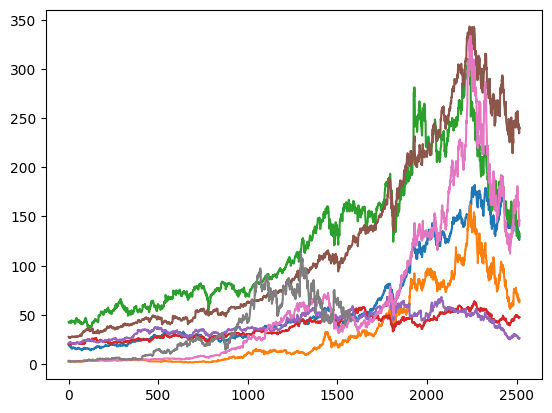

In [87]:

for i in range(Tech_Comp.shape[0]):
    for j in listdir("data\\"):
        if Tech_Comp[i].item() in j:
            df=pl.read_csv(f"data\\{j}")
            CloseV=df.select("Close")
            plt.plot(CloseV)
            print(CloseV.shape[0])

In [85]:
Tech_Comp.shape

(8, 1)

In [81]:
Tech_Comp[1].item()

'AMD'

In [3]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
res=requests.get("https://query2.finance.yahoo.com/v8/finance/chart/SOFI?formatted=true&crumb=ATn%2FOzVhnFV&lang=en-CA&region=CA&events=capitalGain%7Cdiv%7Csplit&includeAdjustedClose=true&interval=1d&range=10y&useYfid=true&corsDomain=ca.finance.yahoo.com",headers=headers)

In [16]:
res.json()["chart"]['result'][0]['meta'].keys()

dict_keys(['currency', 'symbol', 'exchangeName', 'instrumentType', 'firstTradeDate', 'regularMarketTime', 'gmtoffset', 'timezone', 'exchangeTimezoneName', 'regularMarketPrice', 'chartPreviousClose', 'priceHint', 'currentTradingPeriod', 'dataGranularity', 'range', 'validRanges'])

In [18]:
res.json()["chart"]['result'][0]['meta']['dataGranularity']

'1d'

In [38]:
res.json()["chart"]['result'][0]['timestamp']

[1609770600,
 1609857000,
 1609943400,
 1610029800,
 1610116200,
 1610375400,
 1610461800,
 1610548200,
 1610634600,
 1610721000,
 1611066600,
 1611153000,
 1611239400,
 1611325800,
 1611585000,
 1611671400,
 1611757800,
 1611844200,
 1611930600,
 1612189800,
 1612276200,
 1612362600,
 1612449000,
 1612535400,
 1612794600,
 1612881000,
 1612967400,
 1613053800,
 1613140200,
 1613485800,
 1613572200,
 1613658600,
 1613745000,
 1614004200,
 1614090600,
 1614177000,
 1614263400,
 1614349800,
 1614609000,
 1614695400,
 1614781800,
 1614868200,
 1614954600,
 1615213800,
 1615300200,
 1615386600,
 1615473000,
 1615559400,
 1615815000,
 1615901400,
 1615987800,
 1616074200,
 1616160600,
 1616419800,
 1616506200,
 1616592600,
 1616679000,
 1616765400,
 1617024600,
 1617111000,
 1617197400,
 1617283800,
 1617629400,
 1617715800,
 1617802200,
 1617888600,
 1617975000,
 1618234200,
 1618320600,
 1618407000,
 1618493400,
 1618579800,
 1618839000,
 1618925400,
 1619011800,
 1619098200,
 1619184600,

In [2]:
CATech=["CSU","SHOP","NVEI","CDAY","MAGT","DCBO","DND","T","OTEX","LSPD","ENGH","TOI","WE","TSAT","PTK","DGHI","CLS"]

In [34]:
get_tag(CATech[0]+".TO")

('Software—Application', 'Technology')

In [11]:
for stock_tag in CATech:
    StockProfile={}
    time,price=get_price(stock_tag+".TO",13)
    ind,sec=get_tag(stock_tag+".TO")
    StockProfile["Time"]=time
    StockProfile["Price"]=price
    pl.DataFrame(StockProfile).write_parquet(f"CAData\\{stock_tag}_{ind}_{sec}.parquet")

TypeError: 'NoneType' object is not subscriptable

In [8]:
pl.read_parquet("Test.parquet")

Time,Price,Industry,Section
i64,f64,str,str
1265034600,38.48,"""Software—Appli...","""Technology"""
1265121000,39.009998,"""Software—Appli...","""Technology"""
1265207400,39.599998,"""Software—Appli...","""Technology"""
1265293800,40.0,"""Software—Appli...","""Technology"""
1265380200,39.5,"""Software—Appli...","""Technology"""
1265639400,39.5,"""Software—Appli...","""Technology"""
1265725800,39.5,"""Software—Appli...","""Technology"""
1265812200,39.5,"""Software—Appli...","""Technology"""
1265898600,39.5,"""Software—Appli...","""Technology"""


In [ ]:

for i in CATech:
    get_tag(CATech[i]+".TO")